In [24]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)




In [25]:
datapath ='/home/tk/Documents/DataScience/Lecture_Covid_19_data_analysis/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(datapath)

In [26]:
time_idx=pd_raw.columns[4:]
df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


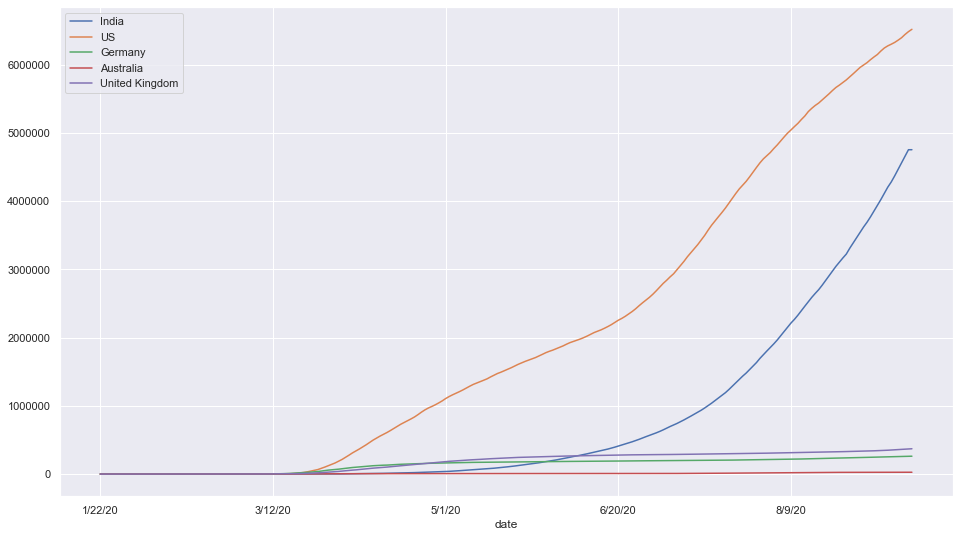

In [27]:
country_list = ['India','US','Germany','Australia','United Kingdom']
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4:].sum(axis=0))
df_plot
df_plot.set_index('date').plot()

In [28]:
sir_plot = pd.DataFrame({
    'date':time_idx})
sir_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [29]:
sir_arr= pd_raw['Country/Region'].unique()
sir_list = sir_arr.tolist()
sir_arr

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [30]:
for each in sir_list:
    sir_plot[each] =np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
sir_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [31]:
sir_plot= sir_plot.drop(columns = ['Taiwan*', 'South Sudan', 'Guyana','Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',
                                   'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, South', 'Kosovo','Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Luxembourg', 'MS Zaandam', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius',
       'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines'])


In [32]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in sir_plot.date] #to convert all the dates into datetime 
time_str= [each.strftime('%Y-%m-%d') for each in time_idx] #to convert datetime function to string
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [33]:
sir_plot.to_csv('/home/tk/Documents/DataScience/Lecture_Covid_19_data_analysis/data/processed/COVID_sir_flat_table.csv', sep=';',index=False)
#Storing the processed data file and sep';' is a seperator [German std]

In [34]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse= df_analyse.iloc[50:]
df_input_large=pd.read_csv('../data/processed/COVID_sir_flat_table.csv',sep=';').iloc[80:]
df_input_large

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
80,4/11/20,555,433,1825,601,19,21,1975,967,6303,...,90273,501,767,175,258,268,4,1,40,14
81,4/12/20,607,446,1914,638,19,21,2142,1013,6315,...,93812,480,865,181,262,271,6,1,43,14
82,4/13/20,665,467,1983,646,19,23,2208,1039,6351,...,98017,483,998,189,265,273,6,1,45,17
83,4/14/20,714,475,2070,659,19,23,2277,1067,6415,...,102365,492,1165,189,266,284,6,1,45,17
84,4/15/20,784,494,2160,673,19,23,2443,1111,6440,...,107465,493,1302,197,267,291,6,1,48,23
85,4/16/20,840,518,2268,673,19,23,2571,1159,6462,...,112808,502,1349,204,268,294,6,1,48,23
86,4/17/20,906,539,2418,696,19,23,2669,1201,6522,...,117798,508,1405,204,268,307,6,1,52,24
87,4/18/20,933,548,2534,704,24,23,2758,1248,6568,...,122534,517,1490,227,268,313,6,1,57,25
88,4/19/20,996,562,2629,713,24,23,2839,1291,6610,...,126394,528,1565,256,268,319,6,1,61,25
89,4/20/20,1026,584,2718,717,24,23,2941,1339,6623,...,131260,535,1627,256,268,329,6,1,65,25


In [35]:
df_con = df_analyse.columns
df_con = list(df_con)
df_con

['date', 'Italy', 'US', 'Spain', 'Germany', 'Korea, South']

In [36]:
df_all = df_input_large.columns
df_all = list(df_all)

In [37]:
import plotly.graph_objects as go
import plotly

In [38]:
fig = go.Figure()
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate
#S0=N0-I0
#R0=0
for each in df_analyse[1:]:
    fig.add_trace(go.Scatter(x=df_analyse.date,
                            y= df_analyse[each],
                            mode='markers+lines',
                            name=each))
fig.update_layout(
    width=1000,
    height=800,
    xaxis_title='Time',
    yaxis_title='Confirmed infected people (source johns hopkins csse, log scale)')

fig.update_yaxes(type='log', range=[1,7])
fig.show()

In [39]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

#Function defined for optimize curve fit

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [40]:
for each in df_all[1:]:
    ydata = np.array(df_input_large[each])
    t=np.arange(len(ydata))
    N0= 6000000 #max susceptible population

    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0

    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata, maxfev = 1200)
    perr = np.sqrt(np.diag(pcov))

    # get the final fitted curve
    fitted=fit_odeint(t, *popt).reshape(-1,1)
    df_input_large[each +'_fitted'] = fitted 
    
df_input_large

/home/tk/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom_fitted,Uruguay_fitted,Uzbekistan_fitted,Venezuela_fitted,Vietnam_fitted,West Bank and Gaza_fitted,Western Sahara_fitted,Yemen_fitted,Zambia_fitted,Zimbabwe_fitted
80,4/11/20,555,433,1825,601,19,21,1975,967,6303,...,90273.000000,501.000000,767.000000,175.000000,258.000000,268.000000,4.000000,1.000000,40.000000,14.000000
81,4/12/20,607,446,1914,638,19,21,2142,1013,6315,...,92052.822804,505.145187,793.136906,183.402756,260.300302,277.414218,4.061948,1.075020,41.921949,14.731954
82,4/13/20,665,467,1983,646,19,23,2208,1039,6351,...,93860.408487,509.324480,820.156490,192.204028,262.621111,287.157792,4.124555,1.155667,43.936088,15.502134
83,4/14/20,714,475,2070,659,19,23,2277,1067,6415,...,95695.878986,513.538156,848.088006,201.422228,264.962610,297.242149,4.187819,1.242363,46.046823,16.312531
84,4/15/20,784,494,2160,673,19,23,2443,1111,6440,...,97559.342174,517.786497,876.961641,211.076569,267.324982,307.679104,4.251735,1.335560,48.258770,17.165242
85,4/16/20,840,518,2268,673,19,23,2571,1159,6462,...,99450.891073,522.069782,906.808535,221.187098,269.708415,318.480876,4.316299,1.435747,50.576764,18.062470
86,4/17/20,906,539,2418,696,19,23,2669,1201,6522,...,101370.603254,526.388297,937.660818,231.774724,272.113095,329.660098,4.381505,1.543447,53.005868,19.006532
87,4/18/20,933,548,2534,704,24,23,2758,1248,6568,...,103318.540093,530.742328,969.551632,242.861250,274.539212,341.229833,4.447348,1.659222,55.551385,19.999866
88,4/19/20,996,562,2629,713,24,23,2839,1291,6610,...,105294.746067,535.132164,1002.515159,254.469407,276.986958,353.203587,4.513821,1.783679,58.218871,21.045037
89,4/20/20,1026,584,2718,717,24,23,2941,1339,6623,...,107299.248012,539.558094,1036.586652,266.622882,279.456524,365.595322,4.580919,1.917468,61.014141,22.144742


In [41]:
df_input_large.to_csv('/home/tk/Documents/DataScience/Lecture_Covid_19_data_analysis/data/processed/COVID_sir_fitted_table.csv', sep=';',index=False)

In [42]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output,State

In [43]:
app = dash.Dash(__name__)
# Define the app
fig = go.Figure()

app.layout = html.Div([
    html.H1("Hello Dash"),
    html.Div("SIR Model"),
    
    dcc.Dropdown(id='country_dropdown_sir',
                options=[ {'label': each,'value':each} for each in df_all[1:]],
                value='India', # which are pre-selected
                multi= False),
    
    dcc.Graph(id = "SIR_model"
    )
])

@app.callback(
    Output('SIR_model', 'figure'),
    [Input('country_dropdown_sir', 'value')])

def SIR_fig(con_input):
    df= df_input_large
    
    for i in df[1:]:
        data = []
        trace = go.Scatter(x=df.date,
                        y=df[con_input],
                        mode='lines+markers',
                        name = con_input)
        data.append(trace)
        
        trace_fitted = go.Scatter(x=df.date,
                        y=df[con_input +'_fitted'], 
                        mode='lines+markers',
                        name=con_input+'_fitted')
        data.append(trace_fitted)
        
        
            
    return {'data': data,
            'layout' : dict(
                width=1280,
                height=720,
                title= 'SIR model',
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
                
            )
        }
                
      # Run the app
if __name__ == '__main__':
    app.run_server(port=4050) # Run the app


Dash is running on http://127.0.0.1:4050/

Dash is running on http://127.0.0.1:4050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4050/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Sep/2020 16:20:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2020 16:20:51] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2020 16:20:51] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2020 16:20:51] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2020 16:21:09] "POST /_dash-update-component HTTP/1.1" 200 -
